# Predictive modelling with Python

*Jure Žabkar, Wed 23rd September 2020*

---

On Aug 2nd 2008, abcNEWS published an [article](https://abcnews.go.com/Health/Fitness/story?id=5499878&page=1) on obesity in America. Here's an interesting statement from it:

*if current overweight and obesity trends continue, 86 percent of Americans could be overweight or obese by the year 2030.
Even more troubling, the authors note, "By 2048, all American adults would become overweight or obese."*

"if obesity trends continue..." How did the researchers come up with these trends and why should they be more careful in the interpretation of these trends?

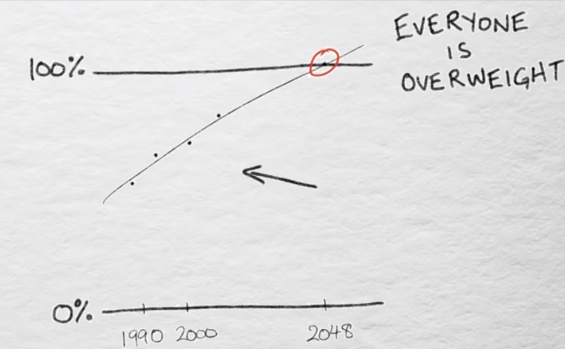

Let's try to do a similar study, this time on rats (mice might have been cuter but they don't get that big). 

## Obesity Apocalypse in Rats

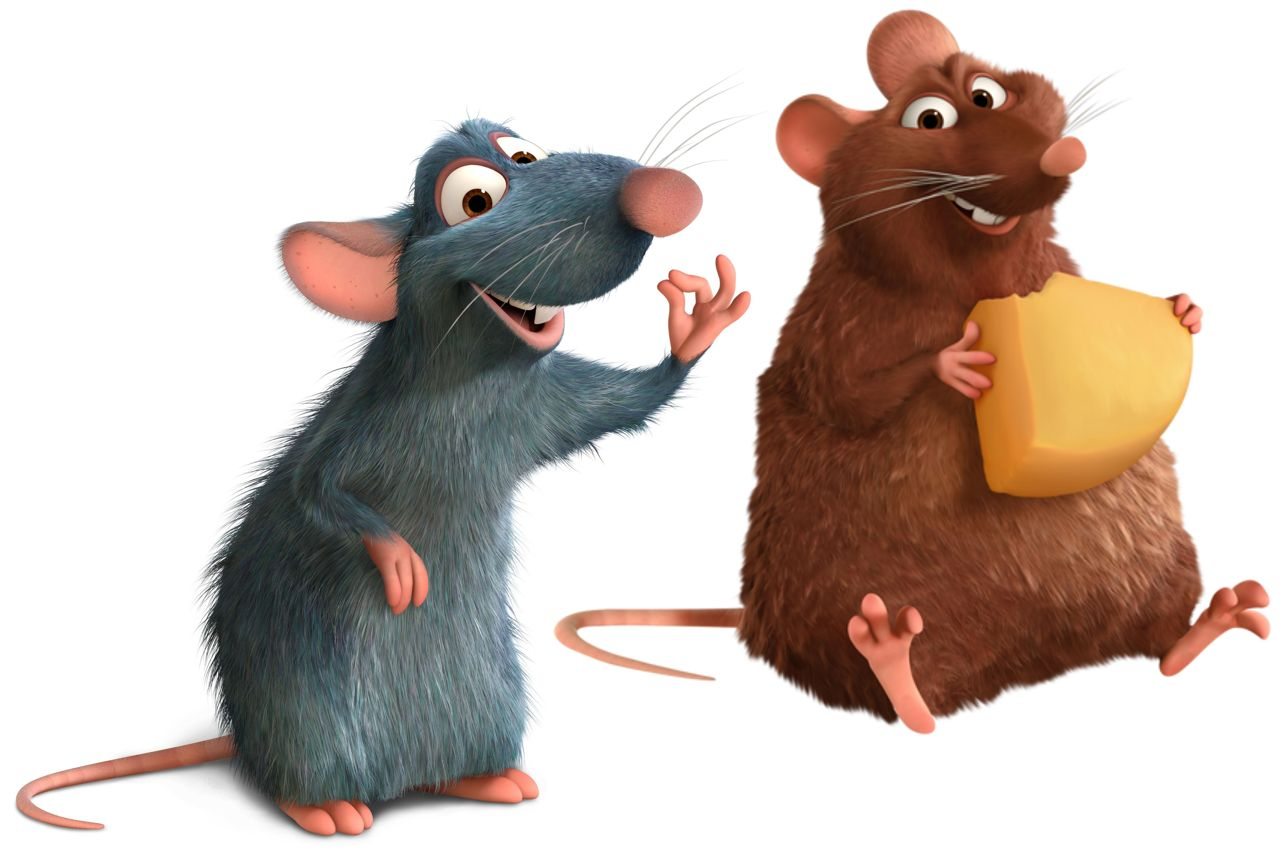

We will learn how to:
* import libraries
* import data from a csv file
* get to know your data: head, describe, info
* print out a DataFrame
* plot the data
* reshape the data
* linear regression: fit, predict
* plot the predictions of the regression model (regression line)
* errors on the training set: mse, mae

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
rats = pd.read_csv("datasets/rats-obesity.csv")
print(rats.head())

     weight       size
0  3.502132  22.271559
1  5.321947  26.007667
2  1.000686   7.232203
3  2.813995  22.490089
4  1.880535  12.433266


In [3]:
print(rats.describe())

          weight       size
count  10.000000  10.000000
mean    2.887776  18.523853
std     1.305650   5.813336
min     1.000686   7.232203
25%     1.939792  14.659924
50%     2.943680  20.930048
75%     3.471750  22.435456
max     5.321947  26.007667


In [4]:
print(rats.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
weight    10 non-null float64
size      10 non-null float64
dtypes: float64(2)
memory usage: 288.0 bytes
None


In [5]:
rats

,weight,size
0,3.502132,22.271559
1,5.321947,26.007667
2,1.000686,7.232203
3,2.813995,22.490089
4,1.880535,12.433266
5,1.554032,14.148107
6,2.117561,16.195376
7,3.073364,21.640214
8,3.380605,20.219881
9,4.232900,22.600167


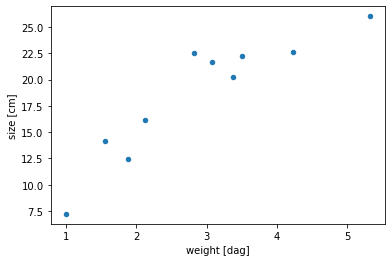

In [10]:
rats.plot.scatter(x='weight', y='size');
# or: rats.plot(kind="scatter", x='weight', y='size');
plt.xlabel("weight [dag]");
plt.ylabel("size [cm]");

In [11]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [14]:
x = rats["weight"]
y = rats["size"]

In [22]:
x

0    3.502132
1    5.321947
2    1.000686
3    2.813995
4    1.880535
5    1.554032
6    2.117561
7    3.073364
8    3.380605
9    4.232900
Name: weight, dtype: float64

In [25]:
x.values

array([3.50213203, 5.32194696, 1.00068625, 2.81399544, 1.88053534,
       1.55403157, 2.11756127, 3.07336436, 3.38060485, 4.2329004 ])

In [19]:
x.shape

(10,)

In [20]:
x.ndim

1

In [26]:
x = x.values.reshape(-1,1)

In [27]:
lin_reg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
y.shape

(10,)

In [29]:
y

0    22.271559
1    26.007667
2     7.232203
3    22.490089
4    12.433266
5    14.148107
6    16.195376
7    21.640214
8    20.219881
9    22.600167
Name: size, dtype: float64

In [30]:
y.values

array([22.27155863, 26.00766716,  7.23220302, 22.49008866, 12.43326582,
       14.14810663, 16.19537577, 21.64021409, 20.21988096, 22.60016714])

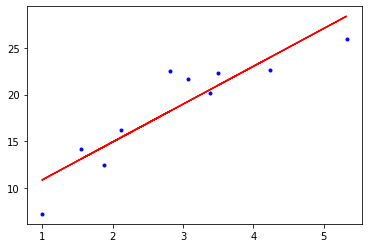

In [43]:
plt.plot(x, y, "b.");
y_predicted = lin_reg.predict(x);
plt.plot(x, y_predicted, "r-");

In [45]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# R^2: the proportion of the variance in y that is predictable from x.
# Explained variance score: 1 is perfect prediction

In [46]:
print("Model performance on TRAIN data:")
print("Mean squared error: {:.2f}".format(mean_squared_error(y, y_predicted) ))
print("Mean absolute error: {:.2f}".format(mean_absolute_error(y, y_predicted) ))
print('Variance score: {:.2f}'.format(r2_score(y, y_predicted) ))

Model performance on TRAIN data:
Mean squared error: 5.20
Mean absolute error: 1.94
Variance score: 0.83
